## Load Required Library

In [5]:
# Create connection to the staging directory.
import boto3
import sagemaker
import pandas as pd
try:
    from pyathena import connect
except:
    !pip install --disable-pip-version-check -q PyAthena==2.1.0
    from pyathena import connect

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

bucket = 'ads508team7'
raw_file_dir   = f"s3://{bucket}/raw_files"
s3_staging_dir = f"s3://{bucket}/athena/staging"
database_name  = 'sys'
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [35]:
# check how many product sold per department

query = """

SELECT 
    sys.Departments.department AS department_name, 
    Count(sys.Departments.department) AS product_sold

FROM sys.Order_products__train

INNER JOIN sys.Products 
    ON sys.Order_products__train.product_id = sys.Products.product_id

INNER JOIN sys.Departments 
    ON sys.Departments.department_id = sys.Products.department_id

GROUP BY sys.Departments.department
ORDER BY product_sold DESC;

"""

product_sold_per_department = pd.read_sql(query, conn)
product_sold_per_department.head()

,department_name,product_sold
0,produce,402665
1,dairy eggs,211919
2,snacks,114523
3,beverages,110925
4,frozen,97507


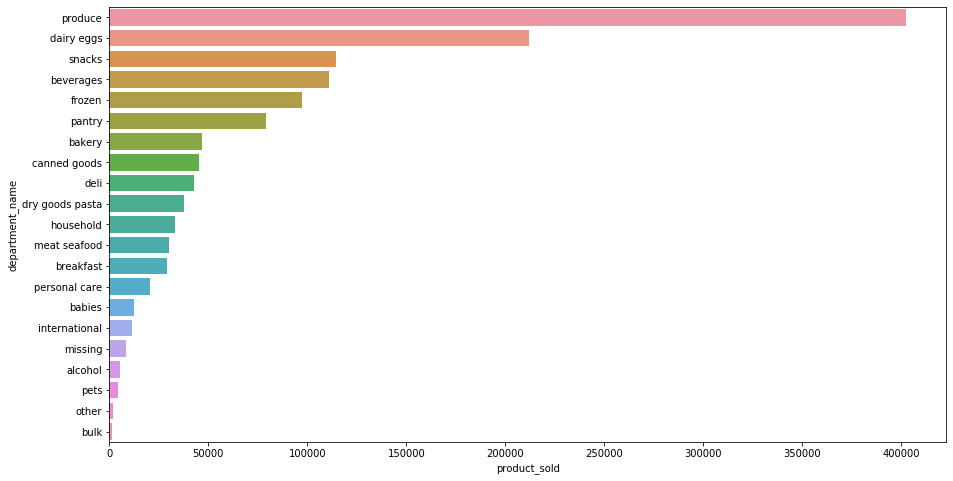

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.barplot(data=product_sold_per_department, x="product_sold", y="department_name", orient = 'h')

## Find which departments has the most sold items

In [53]:
query = """
SELECT 
sys.Departments.department as department, 
COUNT(sys.Products.product_name) AS qty_sold, 
sys.Order_products__train.reordered as reordered

FROM sys.Order_products__train 
INNER JOIN sys.Products 
    ON sys.Order_products__train.product_id = sys.Products.product_id
INNER JOIN sys.Departments 
    ON sys.Products.department_id = sys.Departments.department_id

GROUP BY department, reordered
ORDER BY qty_sold DESC
"""

product_sold_reorder = pd.read_sql(query, conn)
product_sold_reorder.head()

,department,qty_sold,reordered
0,produce,268326,1
1,dairy eggs,142760,1
2,produce,134339,0
3,beverages,73035,1
4,dairy eggs,69159,0
5,snacks,66479,1
6,frozen,54571,1
7,pantry,50291,0
8,snacks,48044,0
9,frozen,42936,0


## Get Distribusation of Sales Based on the Hour Purchase Was Placed

In [46]:
query = """
SELECT 
sys.orders.order_hour_of_day AS hour_of_date,
COUNT(sys.order_products__train.order_id) AS total_orders

FROM sys.Order_products__train 
INNER JOIN sys.orders 
    ON sys.Order_products__train.order_id = sys.orders.order_id

GROUP BY sys.orders.order_hour_of_day
ORDER BY hour_of_date ASC
"""

product_sold_hour = pd.read_sql(query, conn)
product_sold_hour.head()

,hour_of_date,total_orders
0,0,9083
1,1,5626
2,2,3226
3,3,2438
4,4,2431


## Graph to Show Distribusion of Product Sold During Each Hour

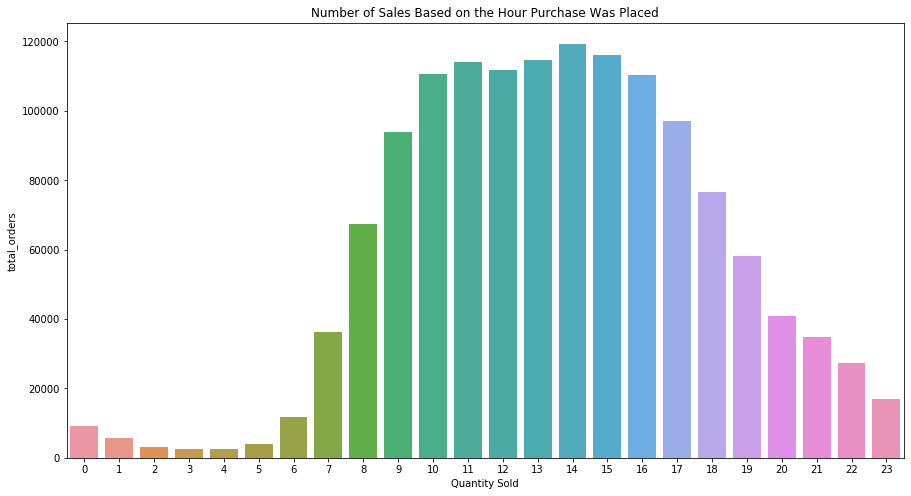

In [51]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data = product_sold_hour, x = 'hour_of_date', y = 'total_orders')
plt.title ('Number of Sales Based on the Hour Purchase Was Placed')
plt.xlabel ('Hour')
plt.xlabel ('Quantity Sold')
plt.show()

## Release Resources

In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>